<a href="https://colab.research.google.com/github/Untick/insects_detection/blob/main/Simakhina%20Evgeniya/%D0%94%D0%B5%D1%82%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_%D0%B2%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://docs.ultralytics.com/quickstart/#use-ultralytics-with-cli

https://habr.com/ru/articles/710016/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive #подключаем библиотеку для работы с google диском
drive.mount('/content/drive') #монтируем google диск

Mounted at /content/drive


In [ ]:
!pip install wget  #для подгрузки файлов по протоколам http и https, ftp
import wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=2dc2cf2d47577ce1239369f3056f1b69948dcff1ad7321b63c1d226a6e73b5d4
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# Install the ultralytics package from PyPI
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.4/616.4 kB 6.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # загрузка предобученной модели YOLOv8n

100%|██████████| 6.23M/6.23M [00:00<00:00, 95.8MB/s]


In [ ]:
trained = model.train(data="/content/drive/MyDrive/Colab Notebooks/Dataset_vrediteli/data.yaml", imgsz=1024, batch=10, epochs=50, plots=True)  # обучение модели на датасете

Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/Dataset_vrediteli/data.yaml, epochs=50, patience=50, batch=10, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tru

In [ ]:
#валидация, проверка
model.val(data="/content/drive/MyDrive/Colab Notebooks/Dataset_vrediteli/data.yaml", conf=0.5)

Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Colab Notebooks/Dataset_vrediteli/valid/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]
                   all         51         77          1      0.665      0.832      0.543
                 vred1         51         20          1       0.85      0.925      0.615
                 vred2         51          3          1      0.333      0.667        0.4
                 vred3         51         19          1          1      0.995      0.741
                 vred4         51         17          1      0.824      0.912      0.584
                 vred5         51         13          1      0.385      0.692      0.391
     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78df0c21ffd0>
fitness: 0.571697777887966
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.61478,     0.39999,     0.74062,     0.58374,       0.391,     0.52667])
names: {0: 'vred1', 1: 'vred2', 2: 'vred3', 3: 'vred4', 4: 'vred5', 5: 'vred6'}
plot: True
results_dict: {'metrics/precision(B)': 1.0, 'metrics/recall(B)': 0.6652463549522373, 'metrics/mAP50(B)': 0.8317729166666666, 'metrics/mAP50-95(B)': 0.5428005402458882, 'fitness': 0.571697777887966}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 12.714456109439626, 'inference': 22.763537425620882, 'loss': 0.0026272792442172182, 'postprocess': 4.911721921434589}

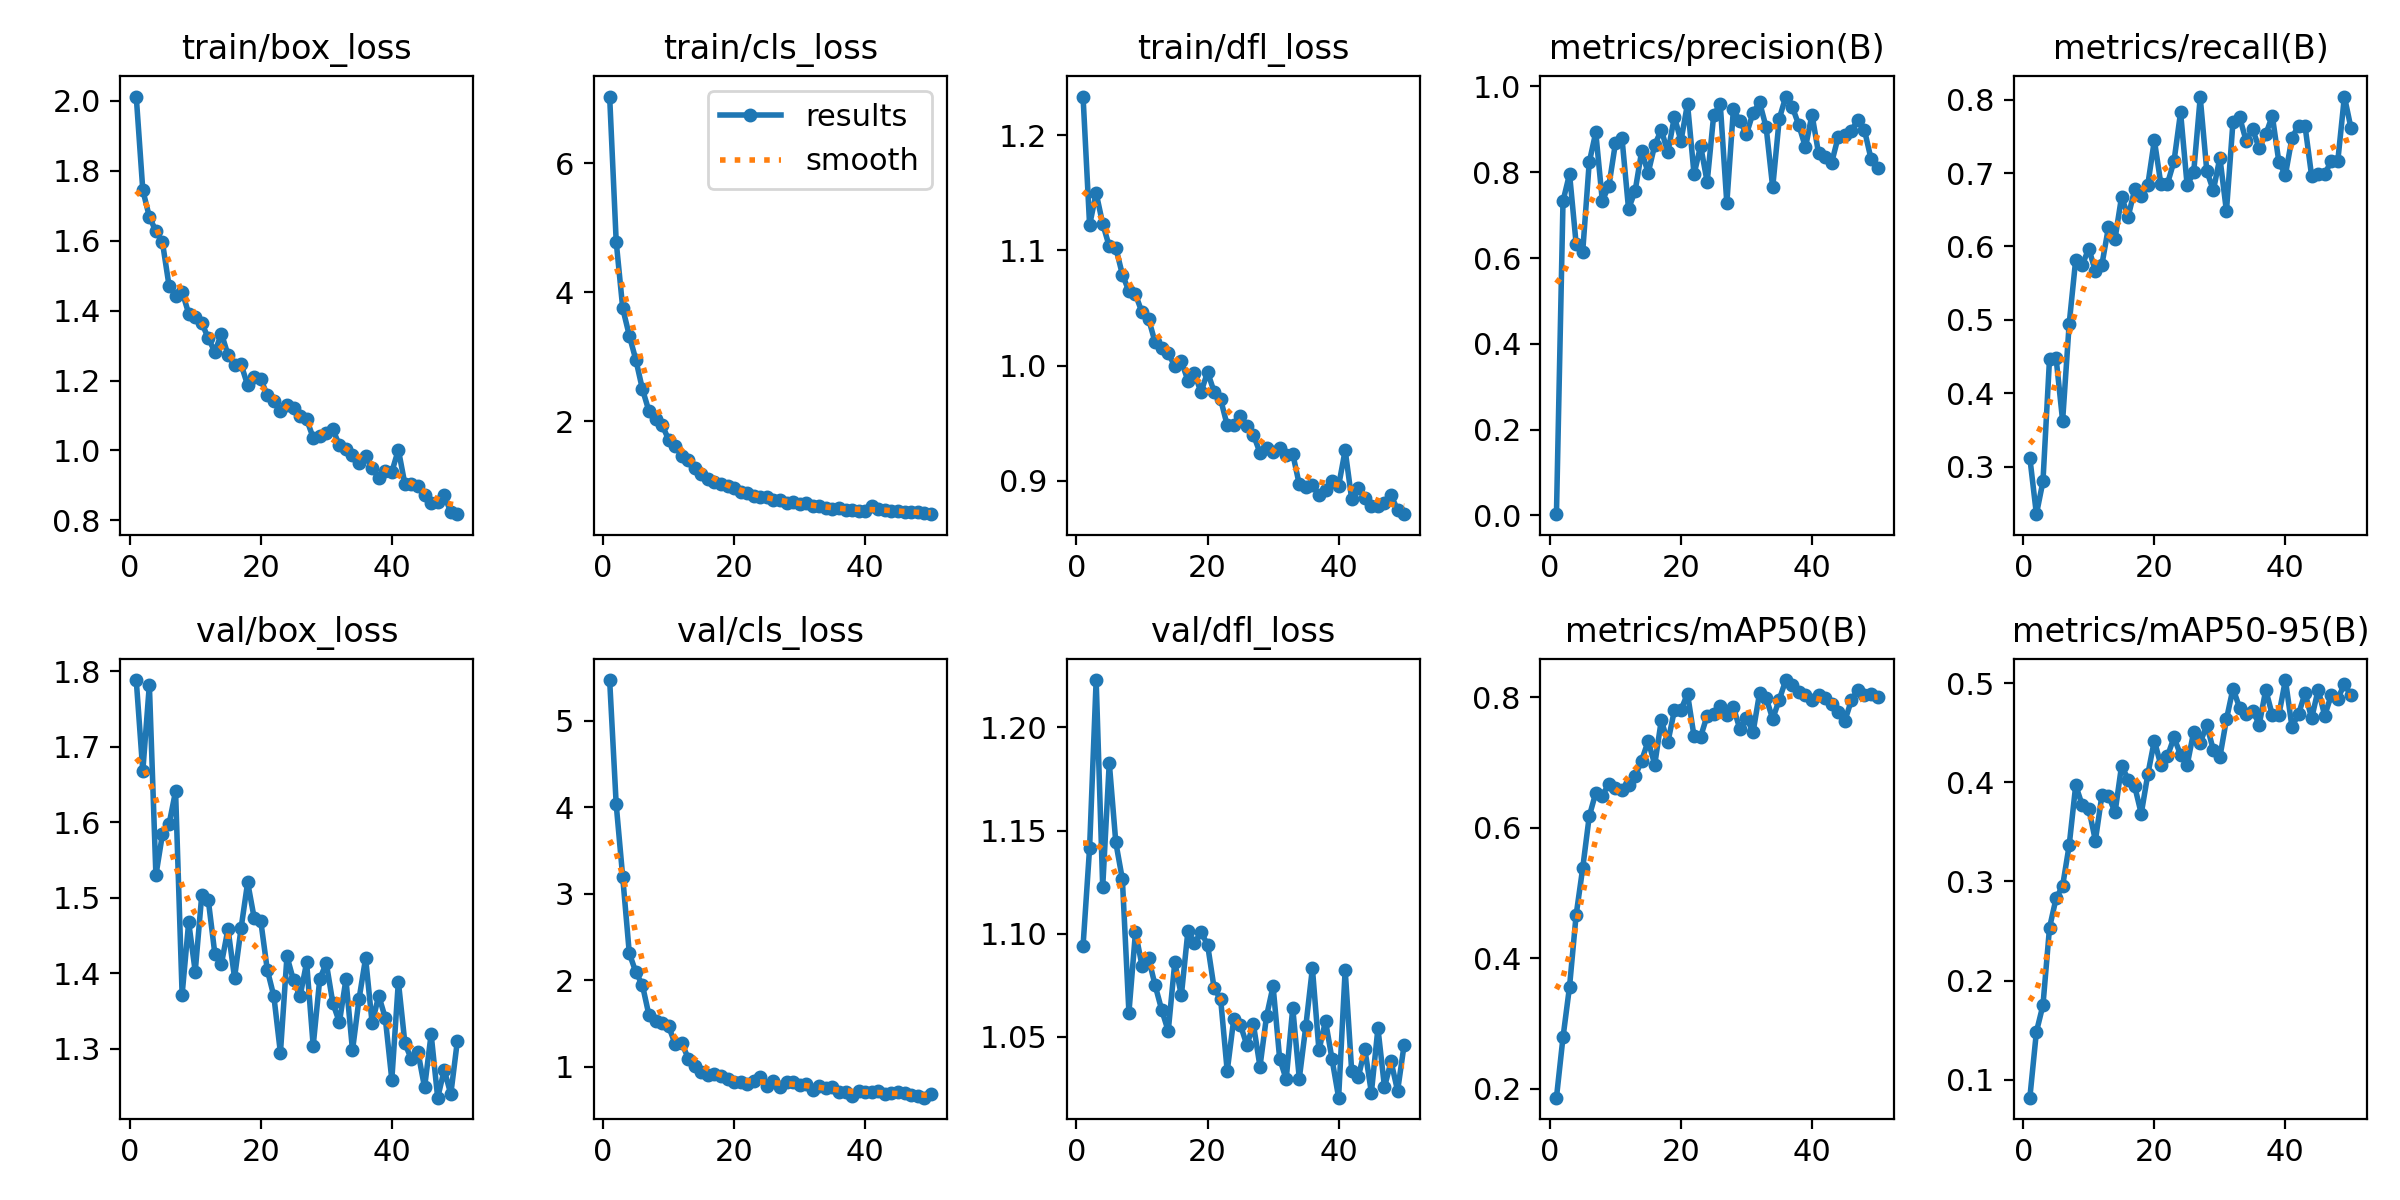

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/train/results.png', height=500)

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
#сохранение весов, чтобы не учить после перезагрузки колаба:

import shutil

# Путь к исходному файлу
source_path = '/content/runs/detect/train/weights/best.pt'

# Путь к целевой папке на Google Диске
target_path = '/content/drive/MyDrive/'

# Копирование файла на Google Диск
shutil.copy(source_path, target_path)

'/content/drive/MyDrive/best.pt'

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
# тестирование, предикт
results = model.predict(source="https://domikdomovenka.ru/files/uploads/vidy-moli3.jpg", save=True, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


Found https://domikdomovenka.ru/files/uploads/vidy-moli3.jpg locally at vidy-moli3.jpg
image 1/1 /content/vidy-moli3.jpg: 736x1024 (no detections), 12.0ms
Speed: 6.2ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1024)
Results saved to runs/detect/predict3


In [ ]:
# вывод данных по тестируемой картинке
print("Bounding box coordinates:", results[0].boxes.xyxy)
print("Log probability of assigned class", results[0].boxes.conf)
print("Assigned class:", results[0].boxes.cls)

Bounding box coordinates: tensor([], device='cuda:0', size=(0, 4))
Log probability of assigned class tensor([], device='cuda:0')
Assigned class: tensor([], device='cuda:0')


In [ ]:
# Create a new YOLO model from scratch:  model = YOLO('yolov8n.yaml')

# Load a pretrained YOLO model (recommended for training):  model = YOLO('yolov8n.pt')

# Train the model using the 'coco128.yaml' dataset for 3 epochs:  results = model.train(data='coco128.yaml', epochs=3)

# Evaluate the model's performance on the validation set:  results = model.val()

# Perform object detection on an image using the model:  results = model('https://ultralytics.com/images/bus.jpg')

# Export the model to ONNX format:  success = model.export(format='onnx')

# обучите модель:  model.train(data="datasets/coco128.yaml")
# оцените производительность модели на наборе проверки:  model.val()
# предсказать по изображению:  model.predict(source="https://ultralytics.com/images/bus.jpg")
# экспортируйте модель в формат ONNX:  model.export(format="onnx")